<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('Sales Dataset.csv')
df.head(11)

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100
5,5,2023-04-25,Female,45,Beauty,1,30,30
6,6,2023-03-13,Male,46,Clothing,2,25,50
7,7,2023-02-22,Male,30,Electronics,4,25,100
8,8,2023-12-13,Male,63,Electronics,2,300,600
9,9,2023-10-07,Female,52,Clothing,4,50,200


In [22]:
df.tail(11)

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
989,989,2023-05-25,Female,58,Beauty,2,500,1000
990,990,2023-12-26,Female,34,Clothing,2,50,100
991,991,2023-08-21,Female,57,Electronics,2,30,60
992,992,2023-02-06,Female,48,Electronics,3,50,150
993,993,2023-12-18,Female,51,Beauty,2,500,1000
994,994,2023-04-30,Female,41,Clothing,1,30,30
995,995,2023-05-16,Male,62,Clothing,1,50,50
996,996,2023-11-17,Male,52,Beauty,3,30,90
997,997,2023-10-29,Female,23,Beauty,4,25,100
998,998,2023-12-05,Female,36,Electronics,3,50,150


In [23]:
df.shape

(1000, 8)

In [24]:
df.columns

Index(['Unnamed: 0', 'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [25]:
df.dtypes

,0
Unnamed: 0,int64
Date,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [27]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [28]:
df.describe(include = 'all')

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,510,NaN,351,NaN,NaN,NaN
mean,499.500000,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,0.000000,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,249.750000,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,499.500000,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,749.250000,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


# Handling Outliers:

In [29]:
Q1 = df['Price per Unit'].quantile(0.25)
Q3 = df['Price per Unit'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df_outliers = df[(df['Price per Unit'] >= lower_bound) & (df['Price per Unit'] <= upper_bound)].copy()

print('Outliers before removing:',len(df))
print('Outliers after removing:',len(df_outliers))


Outliers before removing: 1000
Outliers after removing: 801


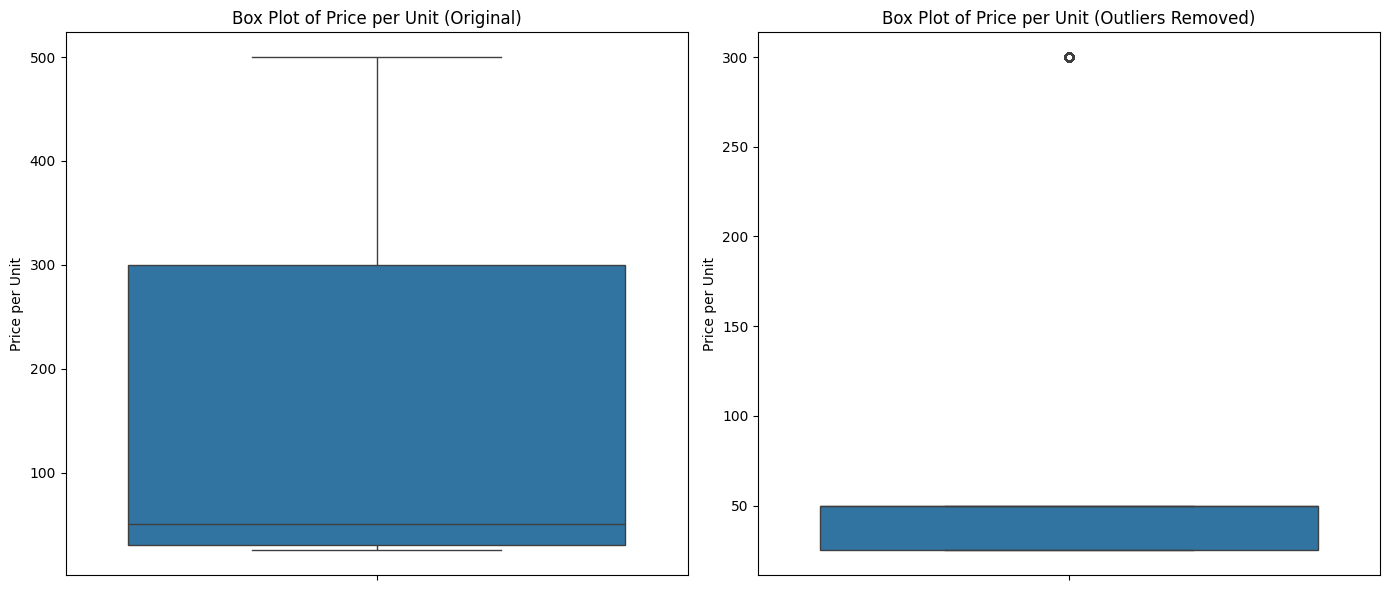

In [30]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for original data
sns.boxplot(data=df, y='Price per Unit', ax=axes[0])
axes[0].set_title('Box Plot of Price per Unit (Original)')
axes[0].set_ylabel('Price per Unit')

# Boxplot for data after removing outliers
sns.boxplot(data=df_outliers, y='Price per Unit', ax=axes[1])
axes[1].set_title('Box Plot of Price per Unit (Outliers Removed)')
axes[1].set_ylabel('Price per Unit')

plt.tight_layout()
plt.show()

# Univariate Analysis

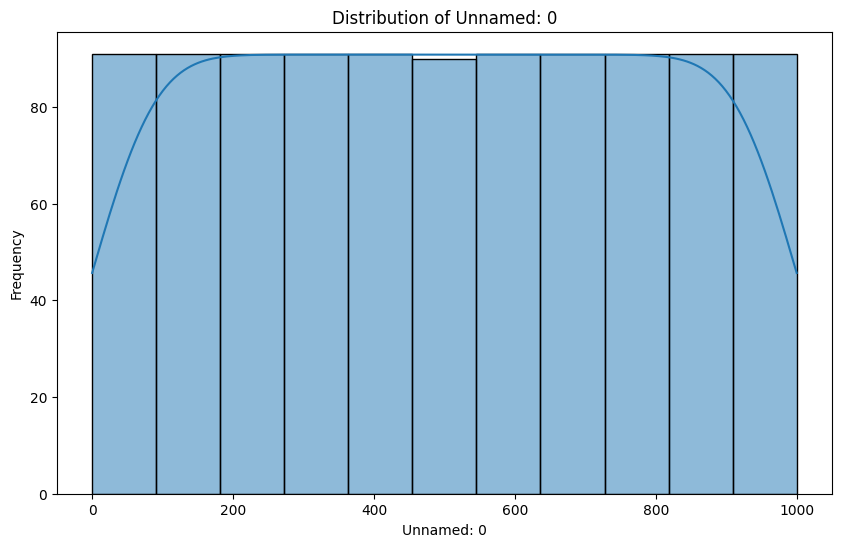

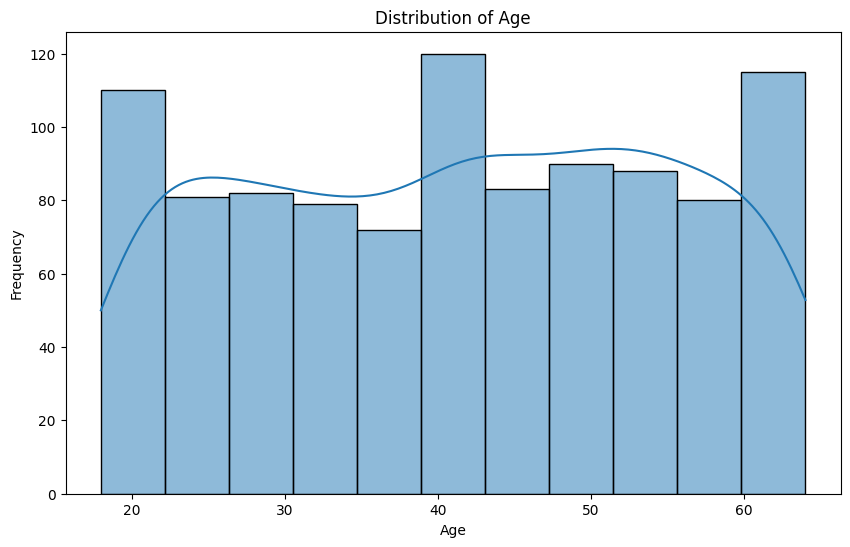

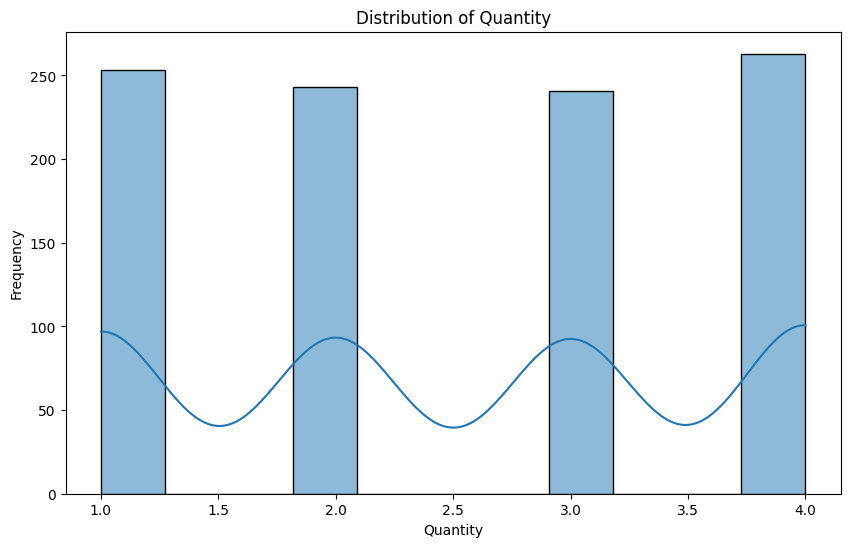

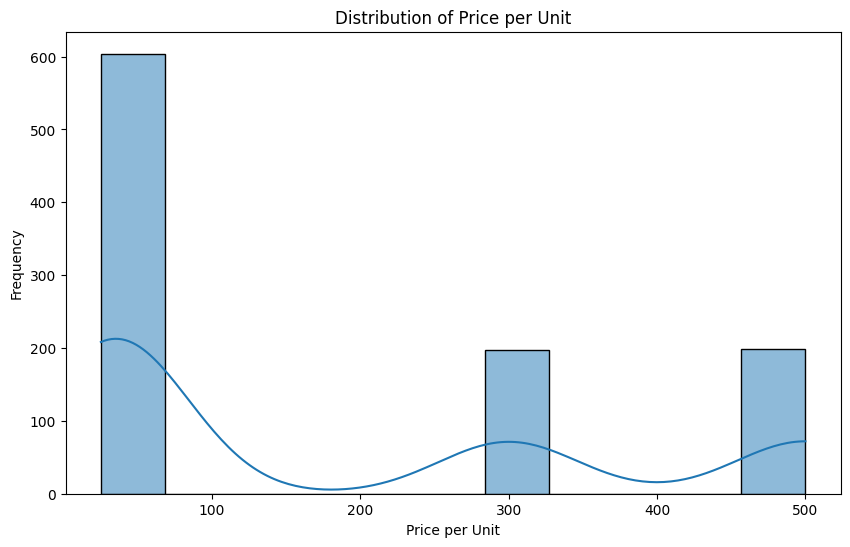

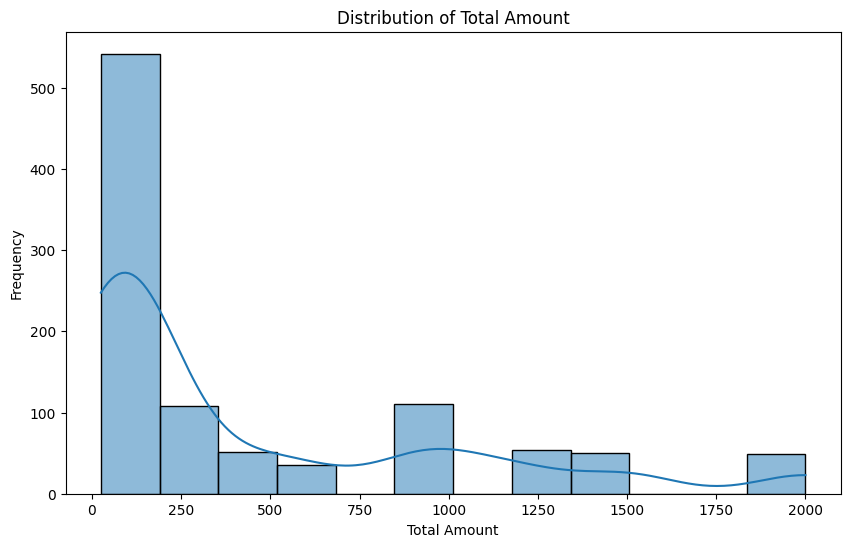

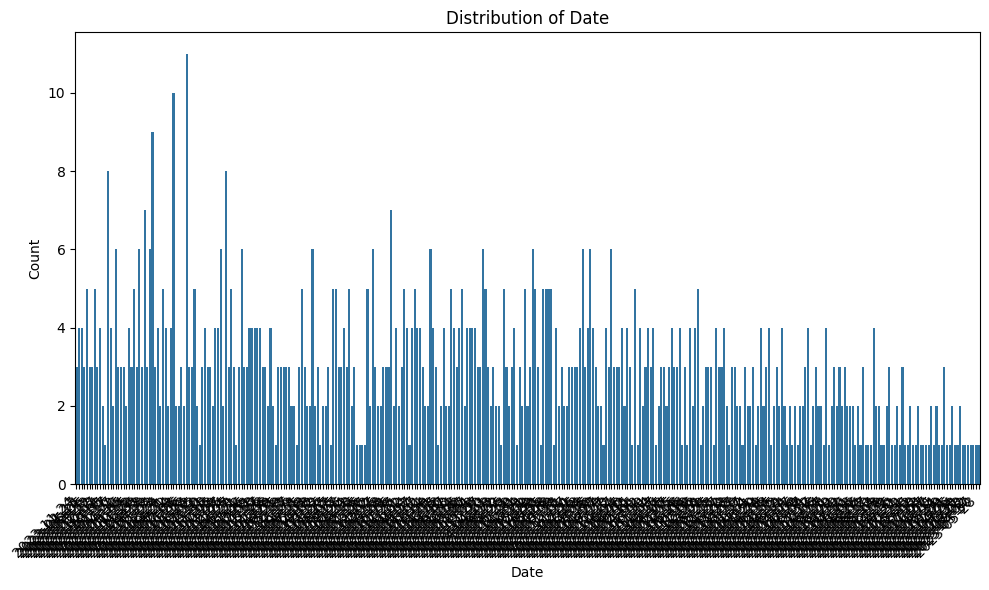

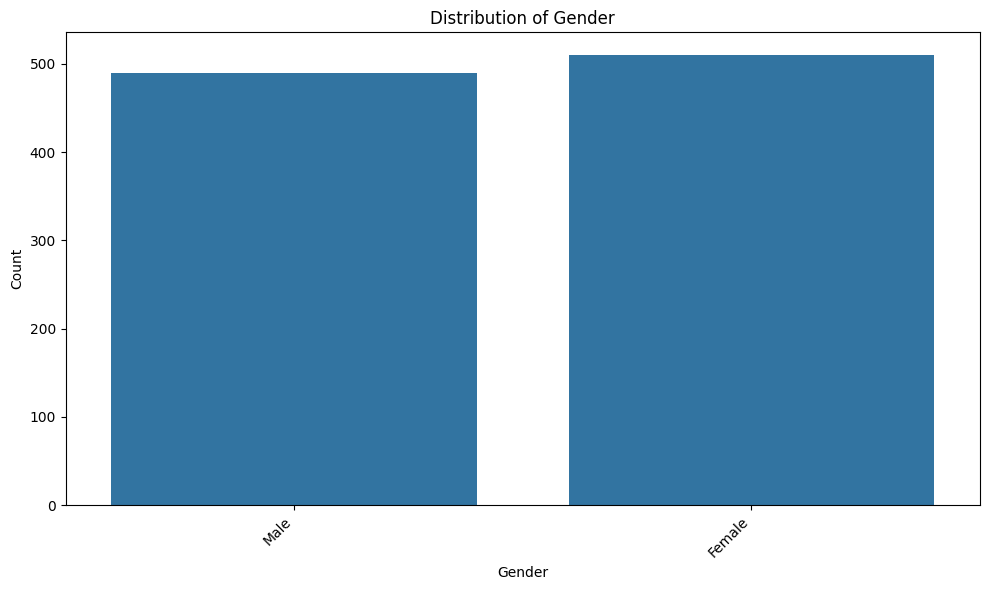

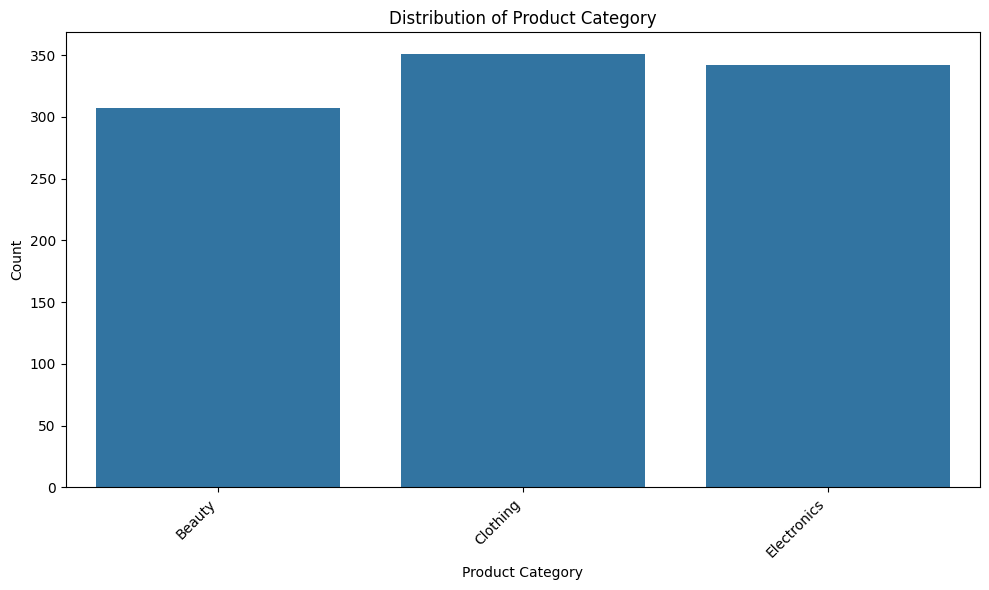

Value counts for Date:
Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-02-05     8
2023-08-05     8
              ..
2023-03-02     1
2023-08-02     1
2023-04-17     1
2023-03-30     1
2023-05-28     1
Name: count, Length: 345, dtype: int64

Value counts for Gender:
Gender
Female    510
Male      490
Name: count, dtype: int64

Value counts for Product Category:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64



In [31]:
# Get a list of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Iterate through categorical columns and create countplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

# Bivariate Analysis

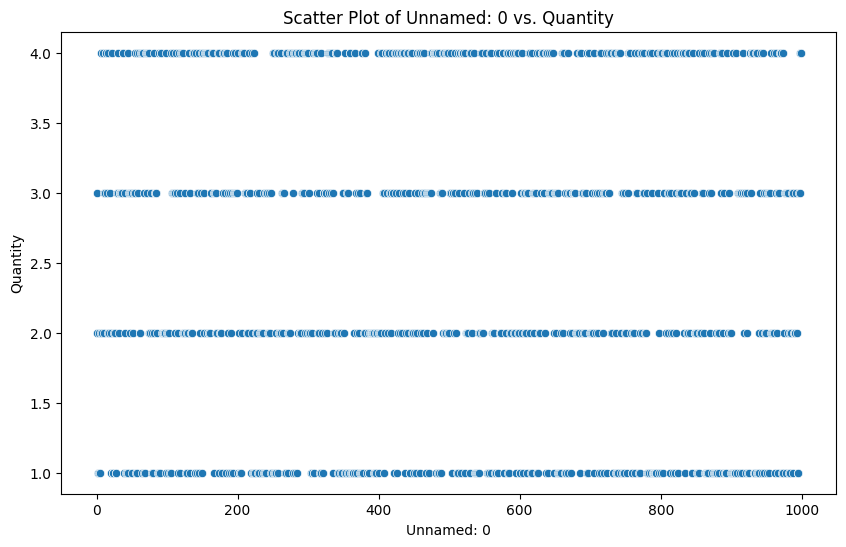

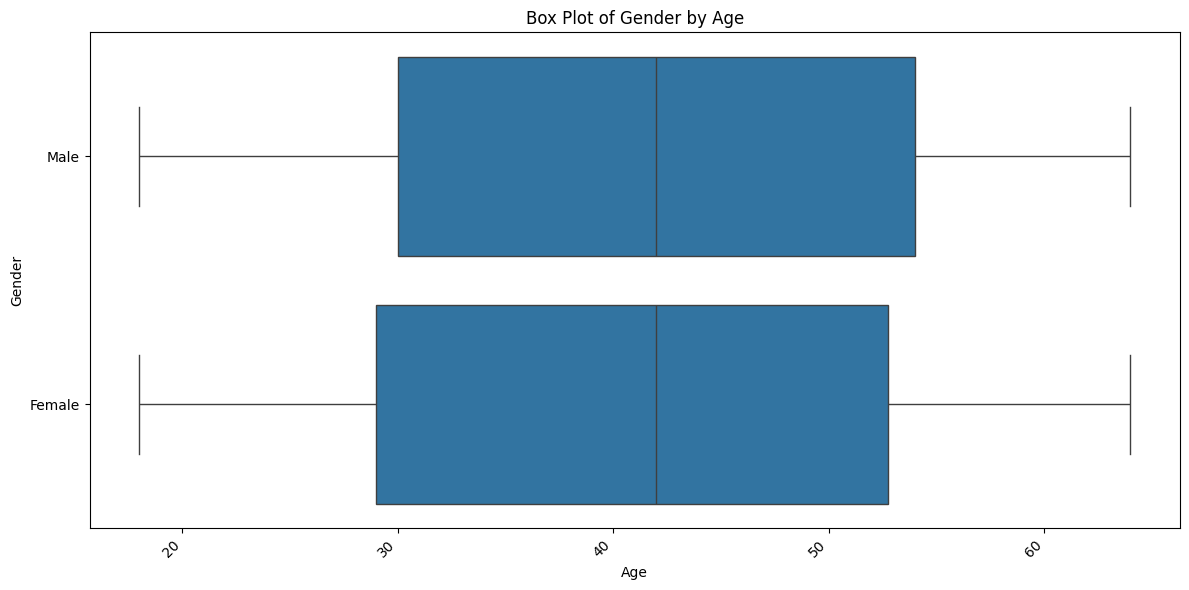

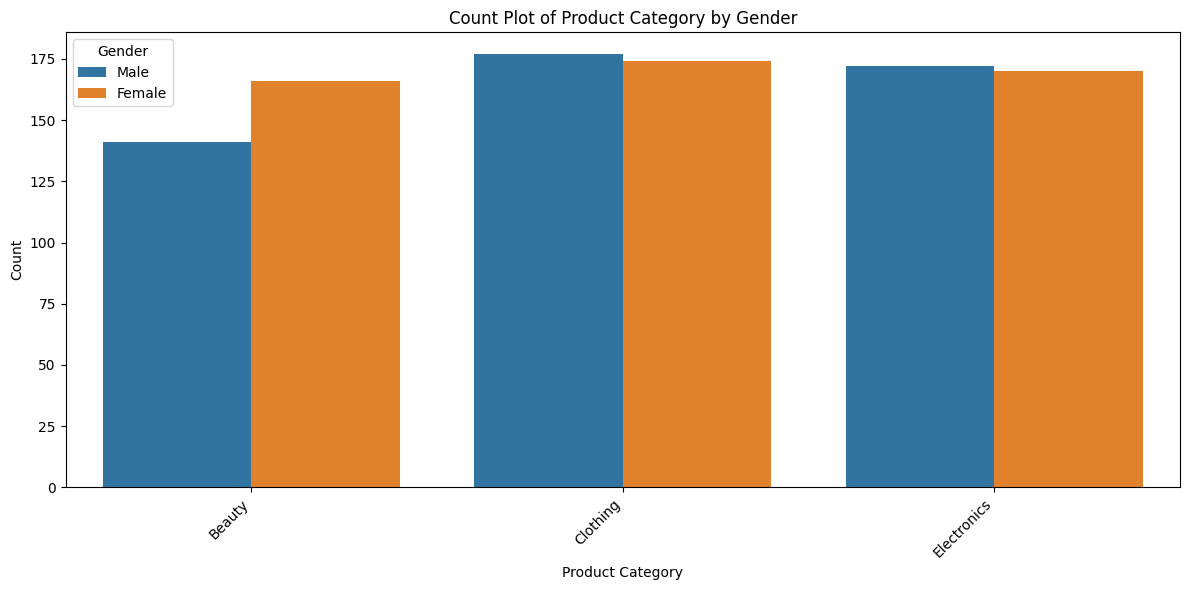

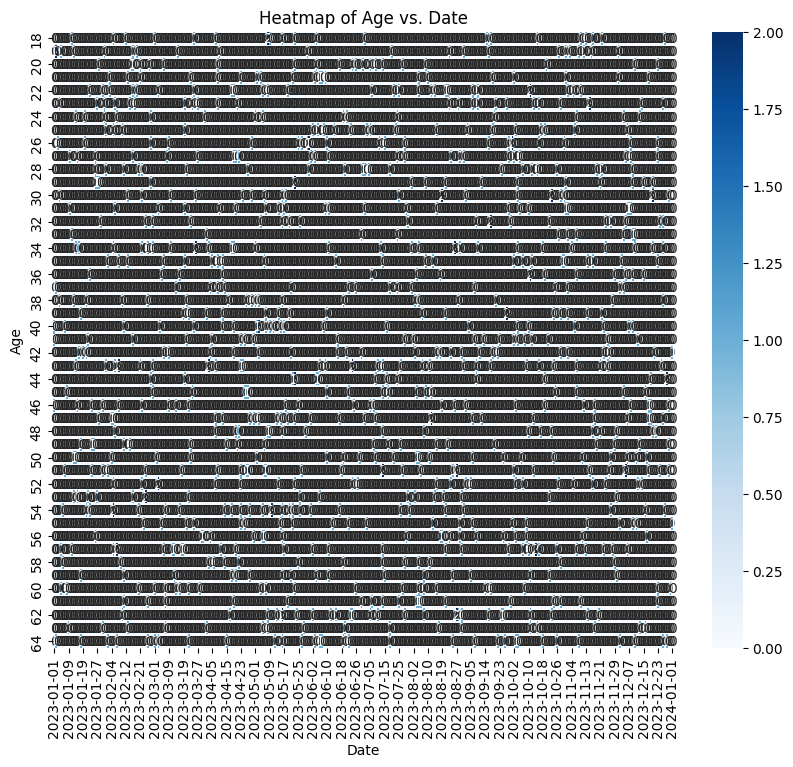

In [32]:
# Numerical vs. Numerical (Scatter Plot)

numerical_col1 = 'Unnamed: 0'
numerical_col2 = 'Quantity'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x= numerical_col1, y=numerical_col2)
plt.title(f'Scatter Plot of {numerical_col1} vs. {numerical_col2}')
plt.xlabel(numerical_col1)
plt.ylabel(numerical_col2)
plt.show()

# Numerical vs. Categorical (Box Plot)

numerical_col_for_box = 'Gender'
categorical_col_for_box = 'Age'

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=categorical_col_for_box, y=numerical_col_for_box)
plt.title(f'Box Plot of {numerical_col_for_box} by {categorical_col_for_box}')
plt.xlabel(categorical_col_for_box)
plt.ylabel(numerical_col_for_box)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Categorical vs. Categorical (Count Plot with Hue)

categorical_col_1 = 'Product Category'
categorical_col_2 = 'Gender'

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=categorical_col_1, hue=categorical_col_2)
plt.title(f'Count Plot of {categorical_col_1} by {categorical_col_2}')
plt.xlabel(categorical_col_1)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Categorical vs. Categorical (Heatmap using Cross-tabulation)

categorical_col_heatmap_1 = 'Age'
categorical_col_heatmap_2 = 'Date'

cross_tab = pd.crosstab(df[categorical_col_heatmap_1], df[categorical_col_heatmap_2])

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title(f'Heatmap of {categorical_col_heatmap_1} vs. {categorical_col_heatmap_2}')
plt.xlabel(categorical_col_heatmap_2)
plt.ylabel(categorical_col_heatmap_1)
plt.show()

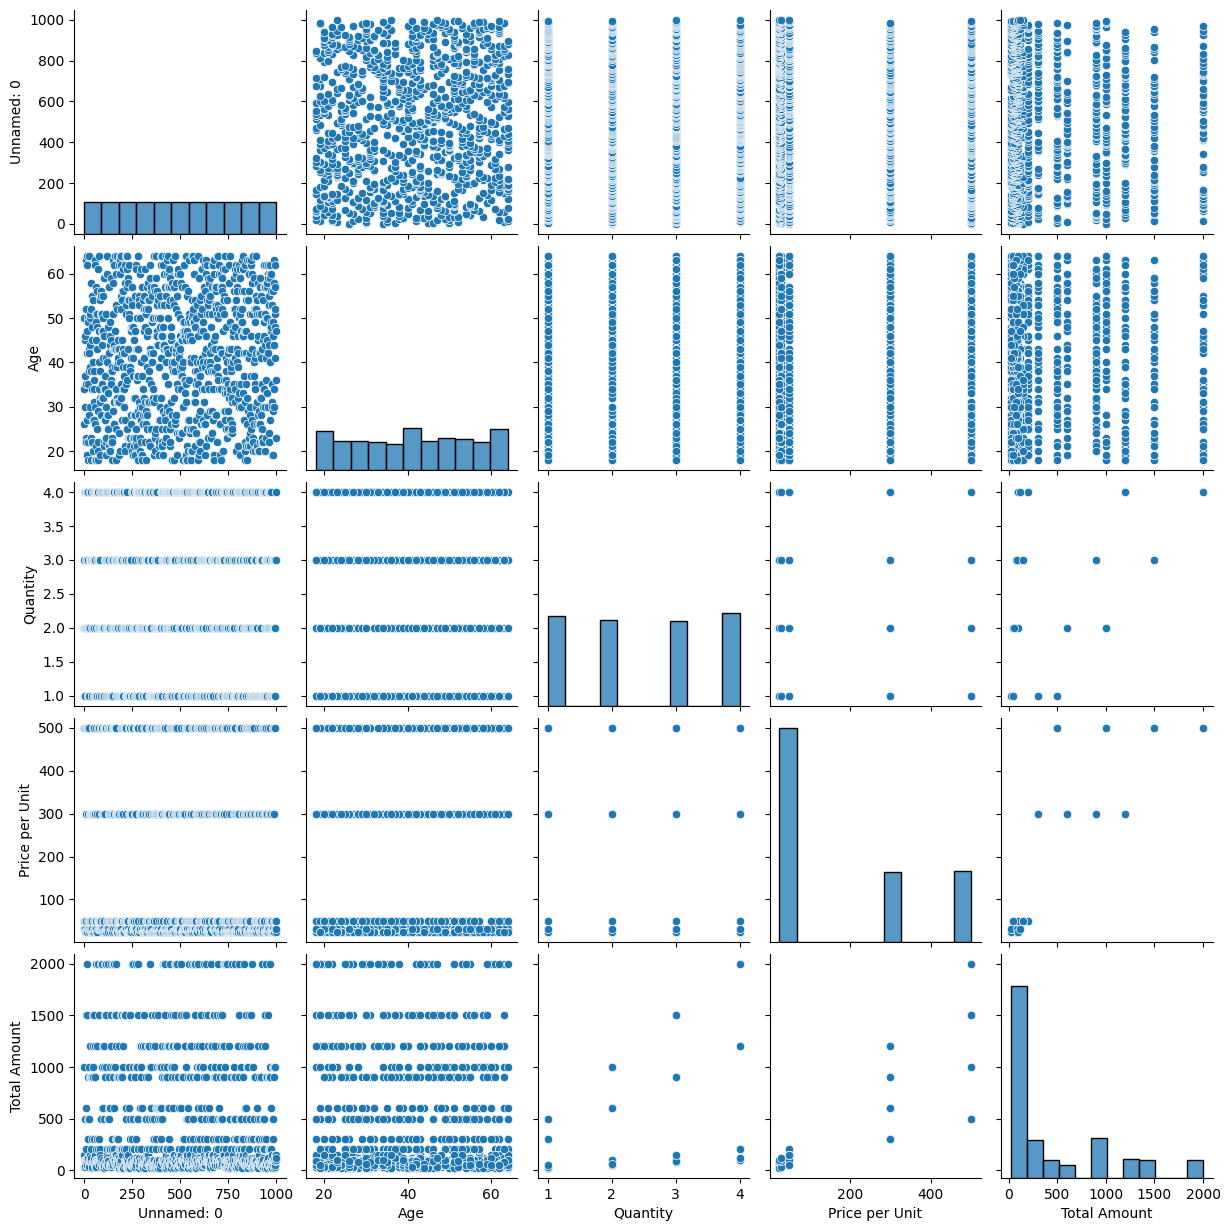

In [34]:
# pair ploting:
sns.pairplot(df)
plt.show()

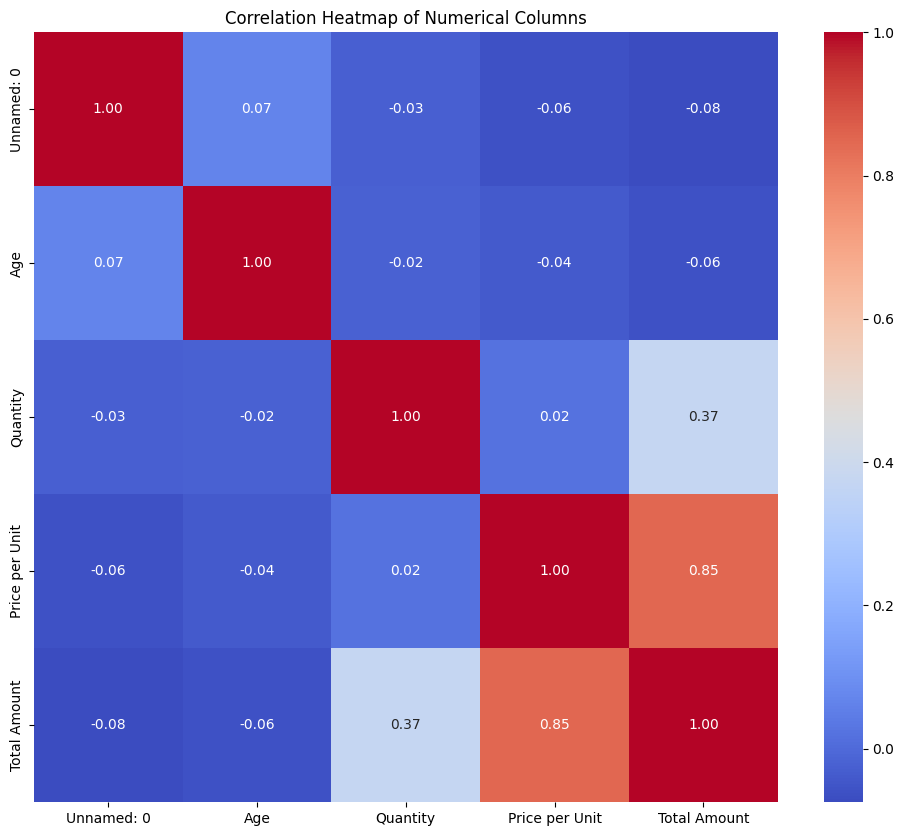

In [33]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Thank you